# Regression linéaire sur le prix des maisons

## Import the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data(test_split=0.3, seed=1)



# Loading csv data, another method
#data=pd.read_csv("BostonHousing.csv", header=0)

# Split of data
#data       = data.sample(frac=1., axis=0)
#data_train = data.sample(frac=0.7, axis=0)
#data_test  = data.drop(data_train.index)

#x_train = data_train.drop('medv',  axis=1) 'medv' is the house price
#y_train = data_train['medv']
#x_test  = data_test.drop('medv',   axis=1)
#y_test  = data_test['medv']   

## Data visualization

In [3]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
print('x_test  : ',x_test.shape,  'y_test  : ',y_test.shape)
x_train.head(10)

x_train :  (354, 13) y_train :  (354, 1)
x_test  :  (152, 13) y_test  :  (152, 1)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53
1,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18
2,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80
3,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10
4,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19
5,0.59005,0.0,21.89,0.0,0.624,6.372,97.9,2.3274,4.0,437.0,21.2,385.76,11.12
6,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70
7,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04
8,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5.0,276.0,16.4,396.90,17.92
9,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81


In [4]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.679883,10.983051,11.129181,0.064972,0.552345,6.313678,68.350282,3.732462,9.737288,412.254237,18.542938,352.176808,12.468757
std,8.691423,22.966498,6.819598,0.246825,0.110090,0.687150,27.945635,2.019922,8.834418,169.211227,2.086872,98.330740,7.056974
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.082102,0.000000,5.145000,0.000000,0.458000,5.907000,42.950000,2.111050,4.000000,284.000000,17.400000,372.555000,6.777500
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.241000,76.700000,3.142300,5.000000,335.000000,19.100000,391.280000,10.685000
75%,3.695990,9.375000,18.100000,0.000000,0.621500,6.629750,93.875000,5.100400,24.000000,666.000000,20.200000,396.270000,16.955000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


## Data normalization

Normalizing the data improves the performance of the model.

In [5]:
mean = x_train.mean()
std  = x_train.std()
x_train = (x_train - mean) / std
x_test  = (x_test  - mean) / std

x_train, y_train = np.array(x_train), np.array(y_train)
x_test,  y_test  = np.array(x_test),  np.array(y_test)

## Build the model

In [14]:
shape=x_train.shape[1] 

model = keras.models.Sequential()
model.add(keras.layers.Input(x_train.shape[1] , name="InputLayer")) 
model.add(keras.layers.Dense(32, activation='relu', name='Dense_n1'))
model.add(keras.layers.Dense(64, activation='relu', name='Dense_n2'))
model.add(keras.layers.Dense(32, activation='relu', name='Dense_n3'))
model.add(keras.layers.Dense(1, name='Output'))

model.compile(optimizer = 'adam',
              loss      = 'mse',
              metrics   = 'mae' )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_n1 (Dense)            (None, 32)                448       
                                                                 
 Dense_n2 (Dense)            (None, 64)                2112      
                                                                 
 Dense_n3 (Dense)            (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [15]:
history = model.fit(x_train,
                    y_train,
                    epochs          = 60,
                    batch_size      = 10,
                    verbose         =  1,
                    validation_data = (x_test, y_test))

Epoch 1/60
36/36 [==============================] - 1s 6ms/step - loss: 508.9640 - mae: 20.7561 - val_loss: 391.0166 - val_mae: 17.7565
Epoch 2/60
36/36 [==============================] - 0s 2ms/step - loss: 211.2697 - mae: 12.0497 - val_loss: 89.1991 - val_mae: 6.9387
Epoch 3/60
36/36 [==============================] - 0s 2ms/step - loss: 54.9088 - mae: 5.6168 - val_loss: 53.9564 - val_mae: 5.1374
Epoch 4/60
36/36 [==============================] - 0s 2ms/step - loss: 32.2149 - mae: 4.2528 - val_loss: 41.6916 - val_mae: 4.4136
Epoch 5/60
36/36 [==============================] - 0s 2ms/step - loss: 24.8971 - mae: 3.7064 - val_loss: 34.8257 - val_mae: 4.0222
Epoch 6/60
36/36 [==============================] - 0s 2ms/step - loss: 21.1458 - mae: 3.3832 - val_loss: 30.6333 - val_mae: 3.8809
Epoch 7/60
36/36 [==============================] - 0s 2ms/step - loss: 18.9567 - mae: 3.2156 - val_loss: 27.5346 - val_mae: 3.5983
Epoch 8/60
36/36 [==============================] - 0s 2ms/step - loss

## Evaluate the model

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / mae       : {:5.4f}'.format(score[1]))


x_test / loss      : 11.5606
x_test / mae       : 2.3168


In [18]:
df=pd.DataFrame(data=history.history)
display(df)
print("min( val_mae ) : {:.4f}".format( min(history.history["val_mae"]) ) )

,loss,mae,val_loss,val_mae
0,508.964020,20.756077,391.016602,17.756510
1,211.269714,12.049718,89.199074,6.938695
2,54.908806,5.616759,53.956371,5.137351
3,32.214924,4.252766,41.691566,4.413576
4,24.897091,3.706445,34.825729,4.022169
5,21.145834,3.383194,30.633337,3.880929
6,18.956678,3.215639,27.534636,3.598277
7,17.453424,3.052796,25.266434,3.469657
8,16.064352,2.915441,23.694534,3.337306
9,15.121146,2.847229,22.766115,3.258428


min( val_mae ) : 2.1918


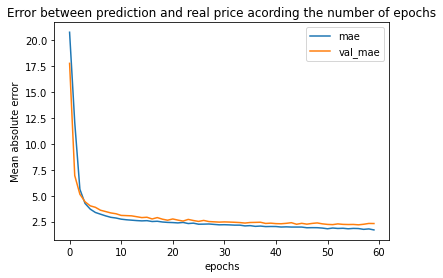

In [19]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

# use Pandas native plot method
plt.xlabel("epochs")
plt.ylabel("Mean absolute error")
plt.title("Error between prediction and real price acording the number of epochs")
history_df['mae'].plot()
history_df['val_mae'].plot()
plt.legend()

## Make a prediction

In [25]:
 my_data = [ 1.26425925, -0.48522739,  1.0436489 , -0.23112788,  1.37120745,
       -2.14308942,  1.13489104, -1.06802005,  1.71189006,  1.57042287,
        0.77859951,  0.14769795,  2.7585581 ]
real_price = 10.4

my_data=np.array(my_data).reshape(1,13)

In [26]:
predictions = model.predict( my_data )
print("Prediction : {:.2f} K$".format(predictions[0][0]))
print("Reality    : {:.2f} K$".format(real_price))

1/1 [==============================] - 0s 18ms/step
Prediction : 10.19 K$
Reality    : 10.40 K$


In [27]:
error_rate=abs(real_price-predictions[0,0])/real_price
print(error_rate)

0.020347870313204286
